In [169]:
%load_ext autoreload
%autoreload 2

In [39]:
import os, sys, time
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [136]:
file_path = "data/"
file_name = "akiyo_qcif.yuv"

In [137]:
path = os.path.join(file_path, file_name)

In [139]:
yuv_data = np.fromfile(os.path.join(file_path, file_name), dtype='uint8')

In [140]:
n_frames, height, width = 300, 144, 176

In [141]:
yuv_data = yuv_data.reshape((n_frames, height*3//2, width))

In [142]:
for frame in yuv_data:
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_YUV2RGB_I420)

In [145]:
rgb_frame.dtype

dtype('uint8')

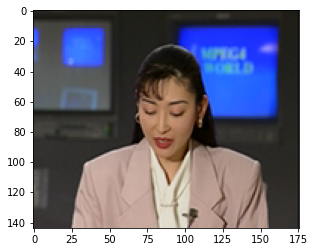

In [144]:
plt.imshow(rgb_frame)

In [147]:
np.random.choice(4, size=4, replace=True)

array([1, 3, 3, 1])

In [153]:
def load_yuv_img(height, width, frames, path):
    f = open(path, 'rb')     
    ten_vid = np.zeros((frames, h, w))
    for i in range(frames):
        # Read Y, U and V color channels and reshape to height*1.5 x width numpy array
        yuv = np.frombuffer(f.read(width*height*3//2), dtype=np.uint8).reshape((height*3//2, width))

        # Convert YUV420 to Grayscale
        gray = cv2.cvtColor(yuv, cv2.COLOR_YUV2GRAY_I420)
        ten_vid[i] = gray
    f.close()
    return ten_vid
    



In [155]:
h = 144
w = 176

akiyo_path = 'data/akiyo_qcif.yuv'
frames = 300


width = w
height = h
#sale_path = '../data/salesman_qcif.yuv'
#frames = 449

ten_vid = load_yuv_img(height, width, frames, akiyo_path)

In [157]:
from ten_compl import am

Score = 8206.891689390939, progress = 25139.437489125317, err = 139.87597005697086, nuc.norm = 1657.784969773143
eval_error_direct 0.388948
Score = 6864.105252540903, progress = 1342.786436850036, err = 100.17260966802695, nuc.norm = 2177.733660307591
eval_error_direct 0.278628
Score = 6471.96697617334, progress = 392.13827636756287, err = 84.99591808961576, nuc.norm = 2332.945226599586
eval_error_direct 0.238360
Score = 6448.0794356367005, progress = 23.88754053663979, err = 81.64806341614694, nuc.norm = 2390.738935367456
eval_error_direct 0.229253
Score = 6414.6182771058175, progress = 33.46115853088304, err = 78.8206080412899, nuc.norm = 2430.723107053077
eval_error_direct 0.222141
Global step completed
Old parameters were: mu = 2, nu = 4607.014701414116
Scale changed. New scale: 0.016213407403866998
New parameters are: mu = 0.016213407403866998, nu = 394.1030402064502
Score = 119342.66315829872, progress = 77109.8563337444, err = 60.334548030309385, nuc.norm = 3540.9699077112064
ev

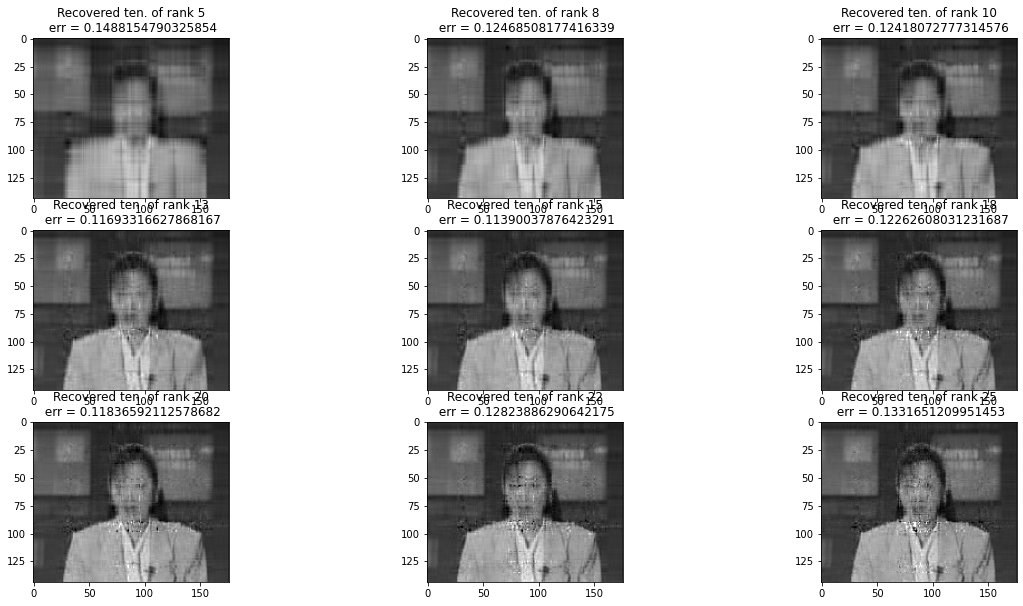

In [158]:
n = (50, h, w)
nx, ny, nz = n

num_entries = 30000
num_test_entries = 20000
np.random.seed(2021)
ind = 0
fig = plt.figure(figsize=(20,10))
for m1 in [5, 8, 10, 13, 15, 18, 20, 22, 25]:
    ind = ind+1
    entries_xyz = am.generate_ten_entries1(ten_vid[:nx]/50, n, num_entries, seed = 2023)
    entries_a = am.from_dict_to_arr(entries_xyz, num_entries)

    test_entries = am.generate_ten_entries1(ten_vid[:nx]/50, n, num_test_entries, seed = 2020)
    test_entries = am.from_dict_to_arr(test_entries, num_test_entries)

    X_0 = np.random.rand(nx*m1).reshape((m1, nx));
    Y_0 = np.random.rand(ny*m1).reshape((m1, ny));
    Z_0 = np.random.rand(nz*m1).reshape((m1, nz));
    res_log, res = am.run_min_balanced(X_0, Y_0, Z_0, n, m1, entries_xyz, num_entries, test_entries, mu = 2,
                                       tau = 0.3, verbose = True, max_iter = 30, lam = 1.0)
    X_res, Y_res, Z_res = res
    rec_ten = am.compute_tensor(X_res, Y_res, Z_res, n, m1).reshape(n)*50
    plt.subplot(3, 3, ind)    
    plt.title("Recovered ten. of rank {}\n err = {}".format(m1, res_log['test_err'][29]))
    plt.imshow(rec_ten[2], cmap='gray', vmin=0, vmax=255)
fig.savefig("recovery_on_rank.png")

In [181]:
from moitra_liu import ML_completion

50 144 176
5
30000
0
Subspace Powering
0.9776887051165494
1
Subspace Powering
0.3058490878962551
2
Subspace Powering
0.2099660777228508
3
Subspace Powering
0.19249764061759594
4
Subspace Powering
0.18529489209136266
5
Subspace Powering
0.18018299694574497
6
Subspace Powering
0.1768761901826575
7
Subspace Powering
0.1742346931326809
8
Subspace Powering
0.16507171930748457
9
Subspace Powering
0.1611757363943056
10
Subspace Powering
0.16119098522262837
11
Subspace Powering
0.16066553455572333
12
Subspace Powering
0.16372390922287164
13
Subspace Powering
0.16059966623668198
14
Subspace Powering
0.16113308005324084
15
Subspace Powering
0.1600619653439115
16
Subspace Powering
0.16033337463196104
17
Subspace Powering
0.16215062201013825
18
Subspace Powering
0.16156399093370177
19
Subspace Powering
0.16189740988507442
20
Subspace Powering
0.16138316874309624
21
Subspace Powering
0.15972821703256138
22
Subspace Powering
0.16310985352472046
23
Subspace Powering
0.1599455837130667
24
Subspace Pow

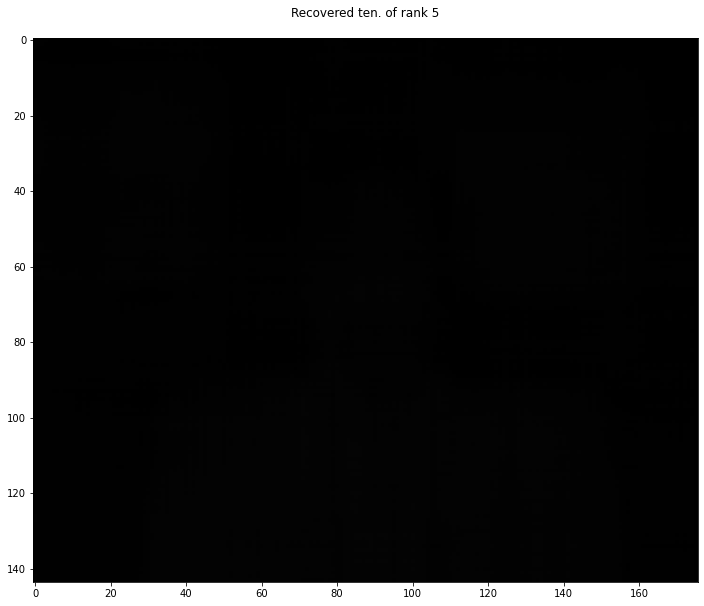

In [186]:
n = (50, h, w)
nx, ny, nz = n

num_entries = 30000
num_test_entries = 20000
np.random.seed(2021)
ind = 0
fig = plt.figure(figsize=(20,10))
idx_frame = 0
for m1 in [5]:
    solver = ML_completion(n=n, rank=m1, num_samples=num_entries, save_file="output.txt", num_iter=30)
    ind = ind+1
    entries_xyz = am.generate_ten_entries1(ten_vid[:nx]/50, n, num_entries, seed = 2023)
    entries_a = am.from_dict_to_arr(entries_xyz, num_entries)
    x_dict = entries_xyz

    test_entries = am.generate_ten_entries1(ten_vid[:nx]/50, n, num_test_entries, seed = 2020)
    test_entries = am.from_dict_to_arr(test_entries, num_test_entries)

    X_0 = np.random.randn(nx*m1).reshape((m1, nx))
    Y_0 = np.random.randn(ny*m1).reshape((m1, ny))
    Z_0 = np.random.randn(nz*m1).reshape((m1, nz))
    
    X_res, Y_res, Z_res = solver.run_for_ten(X_0, Y_0, Z_0, entries_a, test_entries)
    coeffs = solver.get_coeffs(X_res, Y_res, Z_res, x_dict=x_dict, n=n)
    recovered_frame = solver.recover_frame(idx_frame, coeffs, X_res, Y_res, Z_res, n=n)
    
#     plt.subplot(3, 1, ind)    
    plt.title("Recovered ten. of rank {}\n".format(m1))
    plt.imshow(recovered_frame, cmap='gray', vmin=0, vmax=255)
fig.savefig("recovery_on_rank.png")

In [183]:
recovered_frame

array([[0.9689063 , 0.7637869 , 0.9562368 , ..., 0.41741318, 0.54143775,
        0.32050514],
       [0.87478673, 0.63813114, 0.6662895 , ..., 0.45823446, 0.4908445 ,
        0.27867338],
       [0.9128785 , 0.7679913 , 0.78025687, ..., 0.43905485, 0.48149166,
        0.27624905],
       ...,
       [2.5424912 , 1.0521036 , 1.6973057 , ..., 1.4294498 , 1.5378886 ,
        0.8468459 ],
       [2.5283356 , 1.6084328 , 1.7376069 , ..., 1.0989652 , 1.465089  ,
        0.9134527 ],
       [2.5551465 , 1.6170796 , 2.0936594 , ..., 1.2393782 , 1.4822283 ,
        0.8560318 ]], dtype=float32)

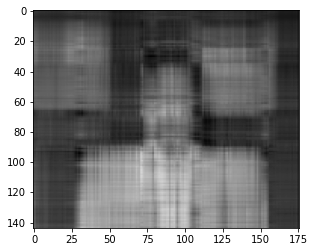

In [187]:
plt.imshow(50*recovered_frame, cmap='gray', vmin=0, vmax=255)